### The Story

This is about an Insurance company that has provided Health Insurance to its customers, now the company needs help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company again.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, I will use the below information: demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), and Policy (Premium, sourcing channel).

Therefore we are interested to predict the response of the customer to take up the insurance (Probability of response 'yes' or '1'). The evaluation metric for this project is ROC_AUC score.

Source of data: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv


In [48]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [49]:
# lets import and explore the dataset:
#insuranc = pd.read_csv('insurance_data.csv')
#insuranc.head()


In [50]:
# to select a small part of data set and save it into a new dataset:
#insurance1=insuranc[:30000]
#insur= insurance1.to_csv('insurance_data1.csv', index=False)


In [51]:
# to read the data:
insurance = pd.read_csv('insurance_data1.csv')
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [52]:
#insurance['Region_Code'].value_counts(np.where(insurance['Region_Code']==28)

In [53]:
# to check on the missing values
insurance.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [54]:
# to see the data types and more information
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    30000 non-null  int64  
 1   Gender                30000 non-null  object 
 2   Age                   30000 non-null  int64  
 3   Driving_License       30000 non-null  int64  
 4   Region_Code           30000 non-null  float64
 5   Previously_Insured    30000 non-null  int64  
 6   Vehicle_Age           30000 non-null  object 
 7   Vehicle_Damage        30000 non-null  object 
 8   Annual_Premium        30000 non-null  float64
 9   Policy_Sales_Channel  30000 non-null  float64
 10  Vintage               30000 non-null  int64  
 11  Response              30000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 2.7+ MB


In [55]:
# drop 'id' and 'Region_Code'column and then add it later: 
#new_df2['id'] = insurance['id']
#new_df2['Region_Code'] = insurance['Region_Code']


#insurance.drop(['id','Region_Code' ], axis=1, inplace=True)

In [56]:
# to see the object columns
insurence_object=insurance.select_dtypes(include=['object'])
insurence_object

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
29995,Male,< 1 Year,No
29996,Male,< 1 Year,Yes
29997,Female,< 1 Year,No
29998,Male,< 1 Year,No


In [57]:
# to apply label encoder to the selected columns:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insurance.Gender= le.fit_transform(insurance.Gender.values)
insurance.Vehicle_Damage= le.fit_transform(insurance.Vehicle_Damage.values)


In [58]:
# to see the corr of selected columns
#insurance[['Driving_License','Previously_Insured']].corr()

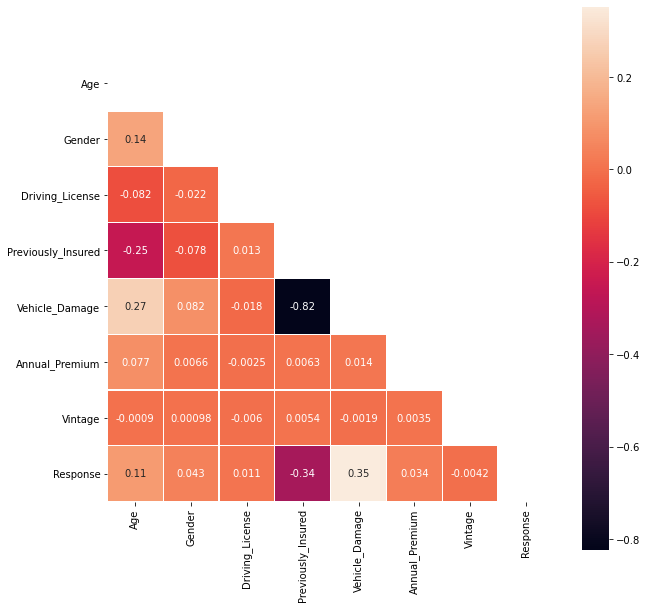

In [59]:
# correlation of selected variables:
f, b = plt.subplots(figsize=(10,10))
corr = insurance[['Age', 'Gender', 'Driving_License',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidth=0.3, square=True, annot=True)

In [60]:
# to drop the columns if their corrlation is above .95:

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] < -0.95)]
to_drop1 = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)
print(to_drop1)

[]
[]


In [61]:
# apply oneHotEncoder
#from sklearn.preprocessing import OneHotEncoder                              
                              
#enc = OneHotEncoder() # here is (), we can write drop='first' to drop one variable
#categorical = pd.DataFrame(enc.fit_transform(insurance[['Vehicle_Age']]).toarray(), columns = enc.get_feature_names())
#categorical.head()

In [62]:
insurance['Vehicle_Age'].value_counts()

1-2 Year     15674
< 1 Year     13057
> 2 Years     1269
Name: Vehicle_Age, dtype: int64

In [63]:
# to decode and get dummies:

dummies= pd.get_dummies(insurance['Vehicle_Age'])
insurance_1 = pd.concat([insurance, dummies], axis=1).drop(['Vehicle_Age'], axis=1)


In [64]:
insurance_1.drop(['> 2 Years'], axis=1, inplace=True)

In [65]:
insurance_1['Response'].value_counts()

0    26285
1     3715
Name: Response, dtype: int64

In [66]:
insurance_1.head()
insurance_1.to_csv('clean_data.csv')

In [67]:
# to rename the columns:
insurance_1.rename(columns={'1-2 Year':'VA_1_2_year', '< 1 Year':'VA_below_1_year'}, inplace=True)
insurance_1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'VA_1_2_year',
       'VA_below_1_year'],
      dtype='object')

### Dataset with Standard Scaler 
Standardize features to mean zero and variance one. 

In [68]:
from sklearn.preprocessing import StandardScaler
to_transform = insurance_1[['Age', 'Annual_Premium','Vintage']]
# to select number type columns: data_num = insurance_2.select_dtypes(include=np.number)
transfor = StandardScaler().fit(to_transform)
transform_data= transfor.transform(to_transform)
transform = pd.DataFrame(transform_data, columns = to_transform.columns)
transform.head()
to_select = insurance_1[['Gender', 'Driving_License',
       'Previously_Insured', 'Vehicle_Damage', 'Response', 'VA_1_2_year',
       'VA_below_1_year']]

insurance_2=pd.concat([transform, to_select], axis=1)

### Dataset with Feature Scaling
This method delas with outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method. Outliers can often influence the sample mean / variance in a negative way. Therefore, the median and the interquartile range often give better results as compared to StandardScaler.

In [69]:
from sklearn.preprocessing import RobustScaler

to_fs = insurance_1[['Age','Annual_Premium','Vintage']]
to_fs_data= RobustScaler().fit(to_fs)
to_fs_data1 = to_fs_data.transform(to_fs)
fs_data = pd.DataFrame(to_fs_data1, columns= to_fs.columns)

insurance_3 = pd.concat([fs_data, to_select], axis=1)


### Modeling, Prediction, and Evaluation


In [75]:
# slpit the data into 80% & 20%

from sklearn.model_selection import train_test_split 

y=insurance_1['Response']

X=insurance_1[['Age','Annual_Premium','Vintage',
               'Gender','Driving_License', 'Previously_Insured', 
               'Vehicle_Damage', 'VA_1_2_year','VA_below_1_year']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


#### Application of Logistic Regression on original dataset (not transformed, not normalised)

In [76]:
from sklearn.linear_model import LogisticRegression 

logistic_model=LogisticRegression().fit(X_train, y_train)
response_pred=logistic_model.predict(X_test)
response_pred = pd.Series(response_pred)

y_pred = pd.Series(response_pred, name='response_pred').value_counts()
y_tes = y_test.value_counts()

y_pred

0    5994
1       6
Name: response_pred, dtype: int64

In [77]:
pd.concat([y_tes, y_pred], axis=1)


,Response,response_pred
0,5286,5994
1,714,6


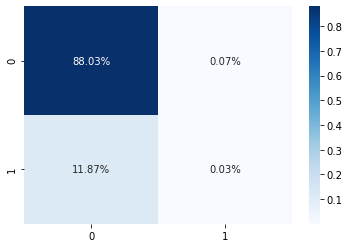

In [78]:
from sklearn.metrics import confusion_matrix

cf_matrix_lr = confusion_matrix(y_test, response_pred)
sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='Blues')


In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, response_pred, pos_label=1))
print(recall_score(y_test, response_pred, pos_label=1))
print(f1_score(y_test, response_pred, pos_label=1))

0.3333333333333333
0.0028011204481792717
0.005555555555555556


In [80]:
# Accuracy score of the Logistic Regression:
from sklearn.metrics import accuracy_score

print('Accuracy score of the logistic regression is: ', logistic_model.score(X_test, y_test))

Accuracy score of the logistic regression is:  0.8806666666666667


In [81]:
# another way of accuracy score:
print ('accuracy score is: ', accuracy_score(y_test, response_pred))


accuracy score is:  0.8806666666666667


I applied the Logistic Regression to the StandardScaled data, but the result did not improve, so i applied the FeatureScaled data to see the improvement:

In [82]:
y=insurance_3['Response']

X=insurance_3[['Age','Annual_Premium','Vintage',
               'Gender','Driving_License', 'Previously_Insured', 
               'Vehicle_Damage', 'VA_1_2_year','VA_below_1_year']]

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.3, random_state=100)


In [83]:
log_reg_fs = LogisticRegression().fit(X_train_fs, y_train_fs)
log_reg_fs_predict = log_reg_fs.predict(X_test_fs)

y_fs_pred = pd.Series(log_reg_fs_predict).value_counts()
y_fs_pred

0    8999
1       1
dtype: int64

### In order to improve the model performance, we emply the decision tree model on the original data set without transormation

In [84]:
# use of original data:
from sklearn.tree import DecisionTreeClassifier

decision_reg = DecisionTreeClassifier(random_state=100).fit(X_train, y_train)
decision_predict = decision_reg.predict(X_test)

response_precidt = pd.Series(decision_predict, name='response_pred').value_counts()

In [85]:
pd.concat([y_tes, response_precidt], axis=1)


,Response,response_pred
0,5286,5190
1,714,810


In [86]:
decision_reg.score(X_test, y_test)

0.8143333333333334

In [87]:
accuracy_score(y_test, decision_predict)

0.8143333333333334

In [88]:
# feature importance Decision Tree (the higher value of 
#feature_importance mean the more important the feature):

decision_reg.tree_.compute_feature_importances(normalize=False)


array([3.66987354e-02, 6.68796616e-02, 7.33183964e-02, 6.63810516e-03,
       4.72485354e-05, 2.44880656e-03, 2.74844839e-02, 3.05246165e-03,
       1.09181954e-03])

In [89]:
print(dict(zip(X.columns, decision_reg.tree_.compute_feature_importances(normalize=False))))

{'Age': 0.03669873537662109, 'Annual_Premium': 0.06687966164744821, 'Vintage': 0.07331839637653878, 'Gender': 0.006638105156722779, 'Driving_License': 4.7248535364088794e-05, 'Previously_Insured': 0.002448806564827536, 'Vehicle_Damage': 0.027484483906578816, 'VA_1_2_year': 0.0030524616457357637, 'VA_below_1_year': 0.0010918195401627999}


the rank of features: Vintage, annual premium, age, vehicle damage, gender, 1-2 years old, previously insured, <1year, driving license.

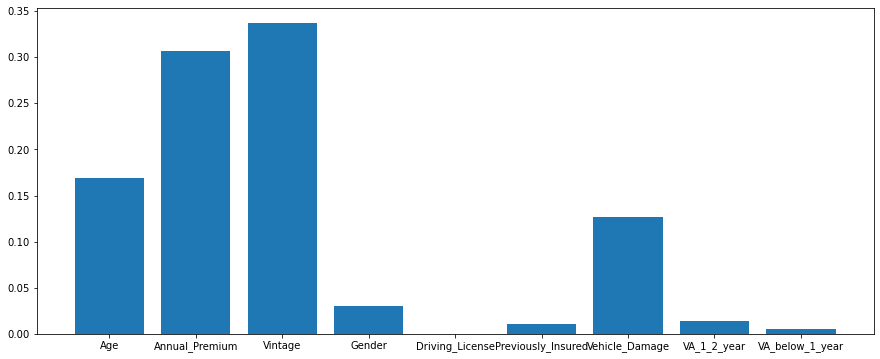

In [90]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.bar(height = decision_reg.feature_importances_, x = X.columns)
plt.show()

In [91]:
#https://mljar.com/blog/visualize-decision-tree/#:~:text=A%20Decision%20Tree%20is%20a,presented%20in%20the%20tree%20leaves.&text=Classification%20trees%20used%20to%20classify,limited%20set%20of%20values%20%2D%20classes

from sklearn import tree
text_representation = tree.export_text(decision_reg)
#print(text_representation)

In [92]:
#from sklearn import plot_tree

"""fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_reg, 
                   feature_names=X.columns,  
                   class_names='response',
                   filled=True)
_"""

"fig = plt.figure(figsize=(25,20))\n_ = tree.plot_tree(decision_reg, \n                   feature_names=X.columns,  \n                   class_names='response',\n                   filled=True)\n_"

In [93]:
#decision_reg.feature_importances_

## Model Evaluation

### Creatre Confusion_matrix for Decision Tree

In [94]:

cf_matrix = confusion_matrix(y_test, decision_predict)
print(cf_matrix)

[[4681  605]
 [ 509  205]]


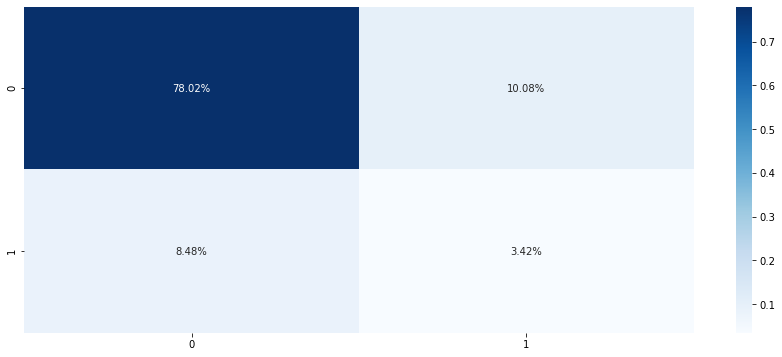

In [95]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')


In [96]:
# We need to assign which is the 'positive class'. Here, we are trying to predict whether a customer will run into
# problems repaying their loan. So Status B is the 'positive' class (meaning credit problems = True)
print(precision_score(y_test, decision_predict, pos_label=1))
print(recall_score(y_test, decision_predict, pos_label=1))
print(f1_score(y_test, decision_predict, pos_label=1))

0.25308641975308643
0.28711484593837533
0.26902887139107606


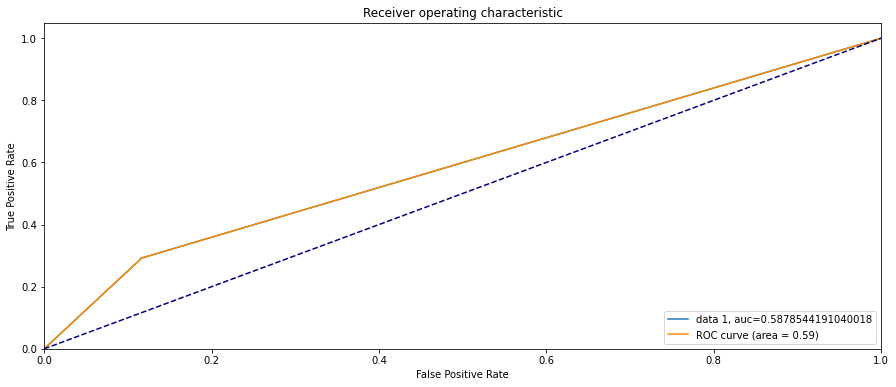

In [97]:
# ROC for Decision Tree

from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba_dt = decision_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_dt)
auc = roc_auc_score(y_test, y_pred_proba_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### DecisionTree model on FeatureScaled data:



In [98]:
# use of normalised data:
dt_fs_data= DecisionTreeClassifier(random_state=100).fit(X_train_fs, y_train_fs)
dt_fs_predict = dt_fs_data.predict(X_test_fs)
dt_fs_pred = pd.Series(dt_fs_predict).value_counts()
dt_fs_pred

0    7884
1    1116
dtype: int64

In [99]:
# confusion_matrix

cf_matrix_dt_fs = confusion_matrix(y_test_fs, dt_fs_predict)
print(cf_matrix_dt_fs)

[[7073  813]
 [ 811  303]]


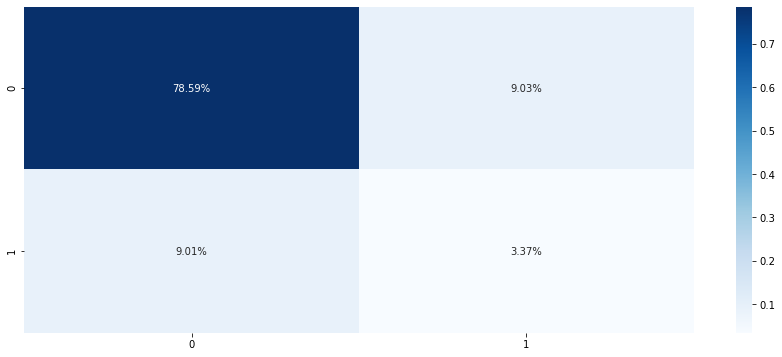

In [100]:

sns.heatmap(cf_matrix_dt_fs/np.sum(cf_matrix_dt_fs), annot=True, fmt='.2%', cmap='Blues')

In [101]:
print(precision_score(y_test_fs, dt_fs_predict, pos_label=1))
print(recall_score(y_test_fs, dt_fs_predict, pos_label=1))
print(f1_score(y_test_fs, dt_fs_predict, pos_label=1))

0.271505376344086
0.2719928186714542
0.2717488789237668


In [102]:
insurance_1['Response'].value_counts()

0    26285
1     3715
Name: Response, dtype: int64

### Dealing with imbalanced data - Under Sampling
https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb 
Random Undersampling:
Random undersampling reduces the number of majority class randomly down to the desired ratio against the minority class. This is probably the easiest way to undersample and can actually yield good results if there are a lot of the majority class instances that are close to each other.


However, most researches have pointed out that undersampling in most cases does produce better results than oversampling. In industrial practice, it has been reported that tech giants like Facebook and Microsoft also tend to use undersampling method when it comes to classifying their ad performance. The common argument is that undersampling is generally “cheaper” than oversampling and since the class of interest is the minority positive class, reducing some information of the majority negative class is acceptable. Once you have a well-balanced data, your model will potentially learn to classify different classes better for a more reliable prediction.

In [103]:
# to install imblearn:
#pip install imblearn

In [104]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)# test size should be small in under sampling


In [105]:
# apply the UnderSampling on original data:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

Before undersampling:  Counter({0: 23652, 1: 3348})


In [106]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [107]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [108]:
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))
#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

After undersampling:  Counter({0: 3348, 1: 3348})
ROC AUC score for undersampled data:  0.7958095271605105


In [109]:
X_test.shape

(3000, 9)

### Application of Logistic Regression on the original data that has been UnderSampled:


In [110]:
    
logistic_model_u=LogisticRegression().fit(X_train_under, y_train_under)
response_pred_u=logistic_model_u.predict(X_test)
response_pred_u = pd.Series(response_pred_u)

y_pred_u = pd.Series(response_pred_u, name='response_pred').value_counts()
y_tes = y_test.value_counts()

print(y_pred_u)
print(precision_score(y_test, response_pred_u, pos_label=1))
print(recall_score(y_test, response_pred_u, pos_label=1))
print(f1_score(y_test, response_pred_u, pos_label=1))

0    1570
1    1430
Name: response_pred, dtype: int64
0.24825174825174826
0.9673024523160763
0.3951029493600445


Low precision relates to a high false positive rate, and high recall relates to a low false negative rate.

In [111]:
# to see the overall report of the various scores from confusion matrix:
from sklearn.metrics import classification_report
print(classification_report(y_test, response_pred_u))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2633
           1       0.25      0.97      0.40       367

    accuracy                           0.64      3000
   macro avg       0.62      0.78      0.57      3000
weighted avg       0.90      0.64      0.70      3000



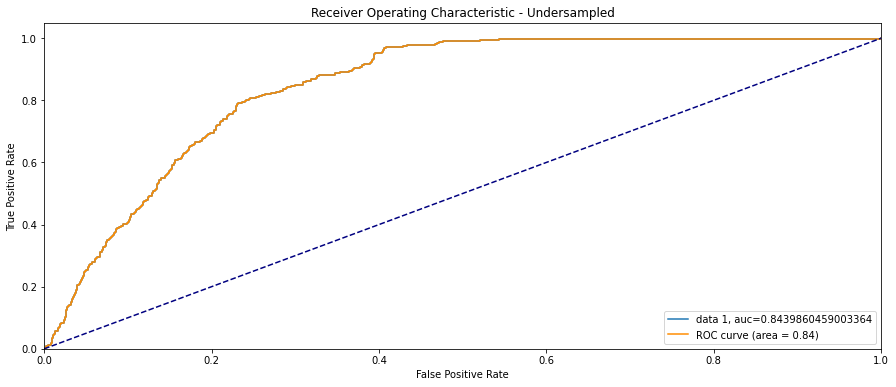

In [112]:
# ROC for Logistic regression when undersampled:

y_pred_proba_u = logistic_model_u.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_u)
auc = roc_auc_score(y_test, y_pred_proba_u)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Undersampled')
plt.legend(loc="lower right")
plt.show()

### Application of  Decision Tree on the original data that has been UnderSampled:


In [113]:
dt_under= DecisionTreeClassifier(random_state=100).fit(X_train_under, y_train_under)
dt_under_predict = dt_under.predict(X_test)
dt_pred = pd.Series(dt_under_predict).value_counts()
dt_pred

0    1999
1    1001
dtype: int64

In [114]:
print("Accuracy:", accuracy_score(y_test, dt_under_predict))

print(precision_score(y_test, dt_under_predict, pos_label=1))
print(recall_score(y_test, dt_under_predict, pos_label=1))
print(f1_score(y_test, dt_under_predict, pos_label=1))

Accuracy: 0.7113333333333334
0.25074925074925075
0.6839237057220708
0.3669590643274853


### Dealing with imbalanced data - Over Sampling


For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular and influential data sampling algorithms in ML and data mining. With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement. These introduced synthetic examples are based along the line segments joining a defined number of k minority class nearest neighbours, which is in the imblearn package is set at five by default.


In [115]:
insurance_1['Response'].value_counts()

0    26285
1     3715
Name: Response, dtype: int64

In [116]:
# define oversampling strategy
y=insurance_1['Response']

X=insurance_1[['Age', 'Annual_Premium','Vintage',
               'Gender','Driving_License', 'Previously_Insured', 
               'Vehicle_Damage', 'VA_1_2_year','VA_below_1_year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

from imblearn.over_sampling import SMOTE

SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 23652, 1: 23652})


In [117]:
# performance of the newly fitted model:
"""model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))"""

'model=SVC()\nclf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)\npred_SMOTE = clf_SMOTE.predict(X_test)\n\nprint("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))'

### Application of Logistic Regression on the original data that has been OverSampled:


In [118]:
logistic_model_o=LogisticRegression().fit(X_train_SMOTE, y_train_SMOTE)
response_pred_o=logistic_model_o.predict(X_test)
response_pred_o = pd.Series(response_pred_o)

y_pred_o = pd.Series(response_pred_o, name='response_pred').value_counts()
y_tes = y_test.value_counts()

print(y_pred_o)
print("Accuracy:", accuracy_score(y_test, response_pred_o))

print(precision_score(y_test, response_pred_o, pos_label=1))
print(recall_score(y_test, response_pred_o, pos_label=1))
print(f1_score(y_test, response_pred_o, pos_label=1))

0    1903
1    1097
Name: response_pred, dtype: int64
Accuracy: 0.7186666666666667
0.28258887876025524
0.8446866485013624
0.4234972677595628


High precision relates to a low false positive rate, and high recall relates to a low false negative rate.

### ROC Curve for OverSampling - case of Logistic regression on Original data
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

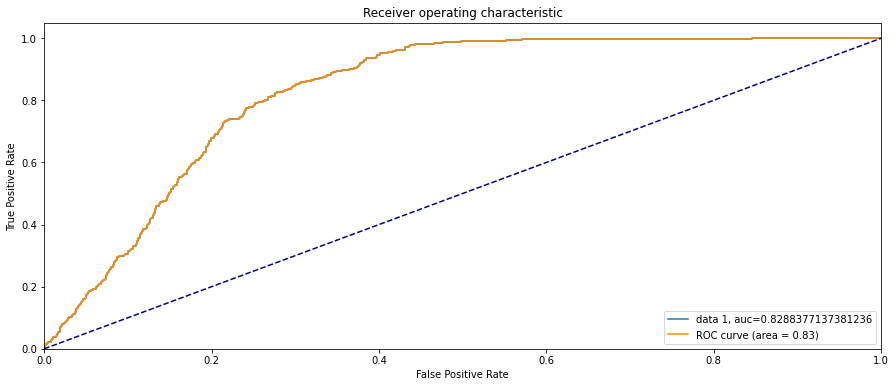

In [119]:
# ROC for Logistic Regression for Over Sample data:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba_o = logistic_model_o.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_o)
auc = roc_auc_score(y_test, y_pred_proba_o)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### A combination of under- and oversampling method using pipeline

In [120]:
# we need all the libraries in UnderSampling and OverSampling as well as below libraries.

# import sampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# define pipeline
model = SVC()
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [121]:
#PART 2
# import libraries for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean

# evaluate pipeline
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)

ROC AUC score for the combined sampling method: 0.511


Here is the codes to create a pipeline to resample the data using both under- and oversampling method.The list of possible ratios for oversampling is [0.3,0.4] while for undersampling [0.7,0.6].

In [122]:
# values to evaluate
"""over_values = [0.3,0.4]
under_values = [0.7,0.6]
for o in over_values:
  for u in under_values:
    # define pipeline
    model = SVC()
    over = SMOTE(sampling_strategy=o)
    under = RandomUnderSampler(sampling_strategy=u)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
    score = mean(scores)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score))
"""

"over_values = [0.3,0.4]\nunder_values = [0.7,0.6]\nfor o in over_values:\n  for u in under_values:\n    # define pipeline\n    model = SVC()\n    over = SMOTE(sampling_strategy=o)\n    under = RandomUnderSampler(sampling_strategy=u)\n    steps = [('over', over), ('under', under), ('model', model)]\n    pipeline = Pipeline(steps=steps)\n    # evaluate pipeline\n    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)\n    score = mean(scores)\n    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score))\n"

In [123]:
#Here is the results of aboe combined model:
"""SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.630
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.647
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.632
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.637"""

'SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.630\nSMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.647\nSMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.632\nSMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.637'

As seen in the output snapshot, the best sampling ratio in this example is to have an oversampling ratio of 0.3, follows by an undersampling ratio of 0.6 for the best possible mean ROC AUC score at 64.7%.

### Variable selection via Logistic Regression oroginal data

In [124]:
y=insurance_1['Response']

X=insurance_1[['Age', 'Annual_Premium','Vintage','Gender','Driving_License', 'Previously_Insured', 
               'Vehicle_Damage', 'VA_1_2_year','VA_below_1_year']]

import statsmodels.api as sm
logit = sm.Logit(y, X)
model=logit.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.279005
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29991
Method:                           MLE   Df Model:                            8
Date:                Thu, 18 Feb 2021   Pseudo R-squ.:                  0.2550
Time:                        19:46:13   Log-Likelihood:                -8370.2
converged:                       True   LL-Null:                       -11235.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0286      0.002    -16.122      0.000      -0.032      -0.025
Annu

#### Interpretation of the Logit results:

- Gender (1=male), male customers are more likely to sign up for insurance.   
- Driving License (0 = no, 1=yes): people who have driving license are less likely to sign up for insurance.
- Previously Insured(1 : Customer already has Vehicle Insurance): people who have already have insurance are less likely to sign up for insurance. 
- Vehicle Damage(1= Customer got his/her vehicle damaged in the past):  Customer whom their vehicle damaged in the past are more likely to sign up for insurance. 
- Vehicle age: customers whom their cars are '1-2 Year' old are less likely to sign up for insurance as compared to customers whom their cars are '> 2 Years' old. 
- Vehicle age: customers whom their cars are '< 1 Year' old are less likely to sign up for insurance as compared to customers whom their cars are '> 2 Years' old. 


Odds ratio:
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/binary-logistic-regression/interpret-the-results/key-results/

In [125]:
# to calculate the Odds ratio(exponent of the estimated coefficients):
print(np.exp(model.params))

Age                   0.971853
Annual_Premium        1.000005
Vintage               0.999701
Gender                1.035174
Driving_License       0.301485
Previously_Insured    0.027632
Vehicle_Damage        6.256166
VA_1_2_year           0.690204
VA_below_1_year       0.165603
dtype: float64


- Age: we can observe that Age has an ODDS Ratio of 0.971853, which indicates that one unit increase in Age increases the odds of signing up for insurance by 0.971853 times.


- Vintage: we can observe that vintage has an ODDS Ratio of 0.999701, which indicates that one unit increase in vintage increases the odds of signing up for insurance by 0.999701 times.


- Annual Premium: we can observe that Annual Premium has an ODDS Ratio of 1.000005, which indicates that one unit increase in Annual Premium increases the odds of signing up for insurance by 1.000005 times.

Odds ratios interpretation for categorical variables:


Odds ratios that are greater than 1 indicate that the people are more likely to sign up for insurance. Odds ratios that are less than 1 indicate that people are less likely to sign up for insurance:


- Gender: The odds ratio is 1.035174, which indicates that the odds that Male customers sign up for insurance is 1.03 times higher compared to the female customers.


- Driving_License: The odds ratio is 0.301485 (less than 1), which indicates that the odds that the customers with driving license are less likely to sign up for insurance as compared to the customers without driving license.


- Previously_Insured: The odds ratio is 0.027632 (less than 1), which indicates that the odds that the customers who previously insured are less likely to sign up for insurance as compared to the new customers.


- Vehicle_Damage: The odds ratio is 6.256166, which indicates that the odds that customers with vehicle damaged sign up for insurance is 6.2 times higher compared to the customers with no vehicle damage.


- vehicle_Age (1-2 Year): The odds ratio is 0.690204 (less than 1), which indicates that the odds that the customers whose vehicle is '1-2 years' old are less likely to sign up for insurance as compared to the customers whose vehicle is '> 2 Years' old.


- vehicle_Age (< 1 Year): The odds ratio is 0.165603 (less than 1), which indicates that the odds that the customers whose vehicle is '< 1 Year' old are less likely to sign up for insurance as compared to the customers whose vehicle is '> 2 Years' old.


### Variable selection via Logistic Regression oroginal data undersampled, as this was the best model with highest ROC_AUC score


In [126]:
X_u=X_train_under
y_u= y_train_under

logit_u = sm.Logit(y_u, X_u)
model_u=logit_u.fit()
print(model_u.summary())

Optimization terminated successfully.
         Current function value: 0.447332
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 6696
Model:                          Logit   Df Residuals:                     6687
Method:                           MLE   Df Model:                            8
Date:                Thu, 18 Feb 2021   Pseudo R-squ.:                  0.3546
Time:                        19:46:13   Log-Likelihood:                -2995.3
converged:                       True   LL-Null:                       -4641.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.5499      0.076     -7.204      0.000      -0.699      -0.400
Annua

In [127]:
print(np.exp(model_u.params))

Age                   0.577035
Annual_Premium        1.055905
Vintage               1.012091
Gender                1.013806
Driving_License       0.681376
Previously_Insured    0.025752
Vehicle_Damage        7.267769
VA_1_2_year           0.698613
VA_below_1_year       0.202514
dtype: float64


### Variable selection via Decision Tree Regression oroginal data undersampled, as this was the best way


In [128]:
# we want to apply decision tree regressor on the re-sized dataset:

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

X=X_train_under
y= y_train_under

model = DecisionTreeRegressor(random_state=100).fit(X, y)
cross_val_score(model,X,y, cv=5)

array([ 0.        ,  0.        , -0.24944058,  0.        ,  0.        ])

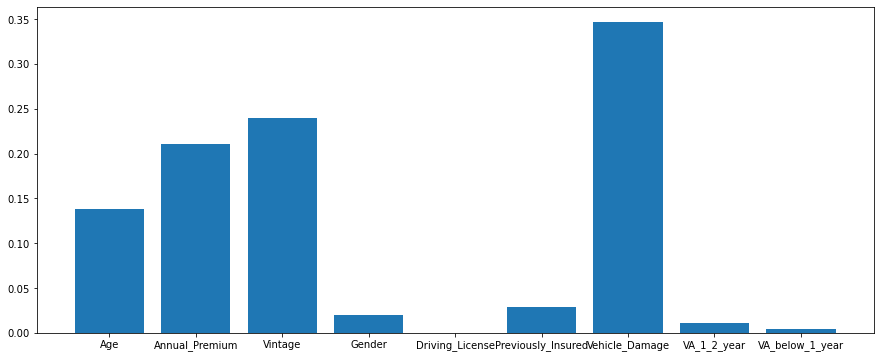

In [129]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.bar(height = model.feature_importances_, x = X.columns)
plt.show()

In [130]:
y_pred=model.predict(X_test)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
6102,1,0.0
2539,0,0.0
21576,1,0.0
19574,0,0.0
12804,0,0.0


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2633
           1       0.00      0.00      0.00       367

    accuracy                           0.88      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.77      0.88      0.82      3000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
# these are only used for regression not classification: 
"""from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))"""

"from sklearn import metrics\nprint('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))\nprint('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))\nprint('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))"

### Real word test

here is our best performed model: logistic_model_u



In [133]:
#www.pythonanywhere.com/

In [141]:
import pickle


In [137]:
logistic_model_u=LogisticRegression().fit(X_train_under, y_train_under)

In [138]:
pickle.dump(logistic_model_u, open('my_model.pickle', 'wb'))

In [134]:
def response():
    
    Age= input('Please enter your age:')
    while re.search('[0-9]',Age) is None:
        print('Make sure your age is in numbers') 
        Age= input('Please enter your age:')
    Annual_Premium = input('Please enter your desired Annual Premium:')
    while re.search('[0-9]',Annual_Premium) is None:
        print('Make sure your Annual Premium is in numbers')
        Annual_Premium = input('Please enter your desired Annual Premium:')
    Vintage = input('How many day have you been associated with ouur company :')
    while re.search('[0-9]',Vintage) is None:
        print('Make sure your Vintage is in numbers')
        Vintage = input('How many day have you been associated with ouur company :')

    Gender = input('Please enter your gender, Male=1, Female=0 :')
    while re.search('[0-1]',Gender) is None:
        print('Make sure your Gender is either 1 or 0')
        Gender = input('Please enter your gender, Male=1, Female=0 :')

    Driving_License = input('Do you have a Driving License? Yes=1, No=0 :')
    while re.search('[0-1]',Driving_License) is None:
        print('Make sure your Driving License either 1 or 0')
        Driving_License = input('Do you have a Driving License? Yes=1, No=0 :')

    Previously_Insured= input('Have you been previously insured with our company? Yes=1, No=0 :')
    while re.search('[0-1]',Previously_Insured) is None:
        print('Make sure that the value is either 1 or 0')
        Previously_Insured= input('Have you been previously insured with our company? Yes=1, No=0 :')

    Vehicle_Damage = input('Has your vehicle been damaged before? Yes=1, No=0 :')
    while re.search('[0-1]',Vehicle_Damage) is None:
        print('Make sure that your entry for vehicle damage is either 1 or 0')
        Vehicle_Damage = input('Has your vehicle been damaged before? Yes=1, No=0 :')

    VA_1_2_year = input('Is your vehicle 1-2 years old? Yes=1, No=0:')
    while re.search('[0-1]',VA_1_2_year) is None:
        print('Make sure your entry is either 1 or 0')
        VA_1_2_year = input('Is your vehicle 1-2 years old? Yes=1, No=0:')

    VA_below_1_year = input('Is your vehicle less than 1 year old? Yes=1, No=0: ')
    while re.search('[0-1]',VA_below_1_year) is None:
        print('Make sure your entry is either 1 or 0')
        VA_below_1_year = input('Is your vehicle less than 1 year old? Yes=1, No=0: ')

    #logistic_model_u=LogisticRegression().fit(X_train_under, y_train_under)
    loaded_model = pickle.load(open('my_model.pickle', 'rb'))
    parameters = ['Age', 'Annual_Premium', 'Vintage', 'Gender', 'Driving_License',
       'Previously_Insured', 'Vehicle_Damage', 'VA_1_2_year','VA_below_1_year']
    my_predictors = [Age, Annual_Premium, Vintage, Gender, Driving_License,
       Previously_Insured, Vehicle_Damage, VA_1_2_year ,VA_below_1_year]
    resp_data = dict(zip(parameters, my_predictors))
    resp_df = pd.DataFrame(resp_data, index=[0])
    #resp_y_pred= logistic_model_u.predict(resp_df)
    resp_y_pred= loaded_model.predict(resp_df)

    if resp_y_pred==1:
        return 'Hooray! This client is taking up our insurance plan'
    elif resp_y_pred==0:
        return 'Oops! This client is not taking up our insurance plan'
    #return f"Response: {float(resp_y_pred)}"

In [ ]:
response()